In [12]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

In [13]:
def metrique(path):
    files = os.listdir(path);
    contenu = [];
    for file in files:
        if file.endswith('.json'):
            openFile = open(path+file, "r");
            contenu.append(json.loads(openFile.read())["Image"]);
            openFile.close();
    return contenu;

In [16]:
chemin = os.getcwd()+"/train/";
contenu = [];
if not os.path.isdir(chemin):
    print('Rajouter le dossier train dans le dossier courant :) ! ');
else :
    contenu = metrique(chemin);

# Utilisation de pandas pour faire de la métrique.

Création du dataframe en fonction des json.

In [17]:
df = pd.DataFrame(contenu)
df.drop(["Date","Author","Content","MediaId", "LearnTag", "ImageId2014","ObservationId2014","YearInCLEF","ObservationId"], axis='columns', inplace=True)
df.sample(10)

,Vote,ClassId,Family,Genus,Species,Location,Latitude,Longitude
1408,3.5,661,Asteraceae,Cichorium,Cichorium intybus L.,Marseille,None,None
3112,4,6418,Orchidaceae,Himantoglossum,Himantoglossum robertianum (Loisel.) P.Delforge,Leucate,42.89684,3.02893
1695,3,8527,Asteraceae,Achillea,Achillea millefolium L.,Saint-Pierre-de-Coutances,49.0357,-1.43967
275,3,30269,Papaveraceae,Papaver,Papaver rhoeas L.,Prades-le-Lez,None,None
1,4.5,4369,Primulaceae,Primula,Primula veris L.,Vienne,48.84187,2.22709
1327,3,5148,Salicaceae,Salix,Salix caprea L.,Sainte-Geneviève-des-Bois,48.8567,2.24104
1055,1,493,Asteraceae,Bellis,Bellis perennis L.,Furiani,42.64367,9.44367
1950,3.5,6512,Orchidaceae,Ophrys,Ophrys lutea Cav.,Saint Jean de Garguier,None,None
3463,3,30162,Orchidaceae,Himantoglossum,Himantoglossum hircinum (L.) Spreng.,Puylaurens,43.55541,2.004
2975,3,4477,Ranunculaceae,Anemone,Anemone alpina L.,Nohèdes,None,None


Savoir le nombre de classe différente.

In [18]:
df['ClassId'].nunique()

50

Répartition des classes.

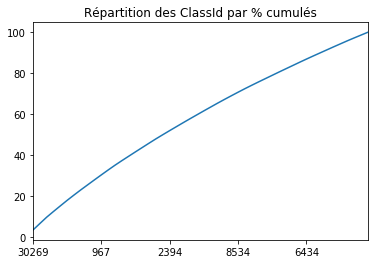

In [48]:
#df['ClassId'].value_counts().plot(kind='line', sharex=False, title='Répartition des ClassId')
#plt.show()

sum = 0
for i in range (1,df['ClassId'].size) :
    sum += 1
        
percents = df['ClassId'].value_counts()/sum*100

for j in range (1,percents.size) :
    percents[j] += percents[j-1]
    

percents.plot(kind='line', sharex=False, title='Répartition des ClassId par % cumulés')

plt.show()

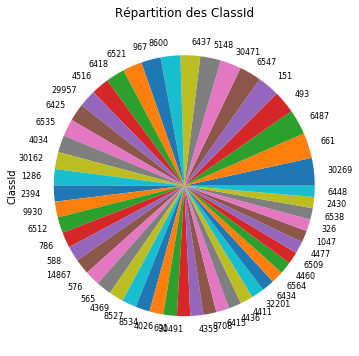

In [20]:
df['ClassId'].value_counts().plot(kind='pie',figsize=(6,6),title='Répartition des ClassId',fontsize=8,legend=False)
plt.show()

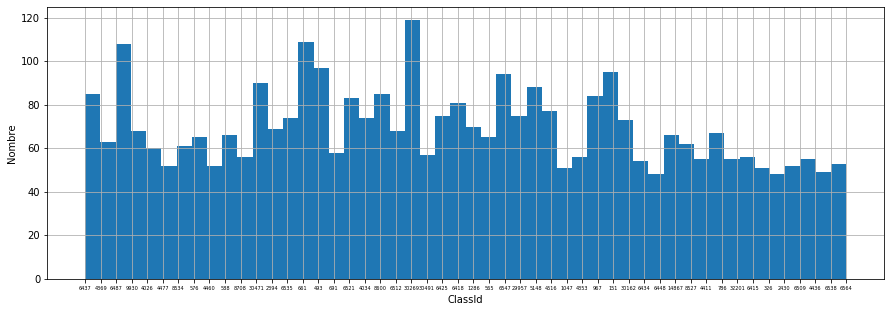

In [21]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df['ClassId'].hist(bins=df['ClassId'].nunique(),ax = ax)
plt.xticks(size = 5)
plt.xlabel('ClassId')
plt.ylabel('Nombre')
plt.show()